In [2]:
#Starter code. Do NOT modify this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in dataset
df = pd.read_csv('CSCI_Fall_2024_survey.csv',delimiter=',')

In [3]:
#df_birthplace = df("What state/country were you born in?")
df.rename(columns={"What state/country were you born in?":"Birthplace",
                    'How many pets and of which kind do you have?' :'Pets',
                      'What is your favorite type of food?':"Food",
                      'What is your major?': "Major",
                        'How old are you?' : "Age"  }, inplace=True)

df.columns

Index(['Timestamp', 'What is your name?', 'What are your pronouns?',
       'Birthplace', 'How many siblings do you have?',
       'How much experience do you have programming?',
       'What class are you in? ', 'Are you working while in school?', 'Pets',
       'Food', 'Where do you live?', 'Do you take the metro?', 'Major', 'Age',
       'What is your favorite TV show?', 'What is your favorite video game?',
       'What is your favorite book?', 'Why are you taking this class? ',
       'Whats your favorite bash command?'],
      dtype='object')

In [4]:
m = "Midwest"
e = "East"
w = "West"
f = "Foreign"
df["Birthplace"] = df["Birthplace"].replace({"Missouri" : m,
                                              "Mexico": f,
                                                "Wisconsin": w,
                                                  "New Jersey" : e,
                                                   "Frankfurt, Germany": f,
                                                    "st. louis, mo": m,
                                                      " India " :f,
                                                      "St. Louis MO": m,
                                                      "Missouri, USA": m,
                                                      "Georgia (the country not the state)": f,
                                                      "st.louis mo": m,
                                                      "Saint Louis, Missouri": m,
                                                      "Kansas, Overland Park": m,
                                                      "    United States Missouri ":m,
                                                      "Oklahoma": m,
                                                      "I was born in Chandigarh, India!": f,
                                                      "People's Republic of China": f,
                                                      "india": f,
                                                      "Cameroon": f,
                                                      "TEXAS" : m,
                                                      "Kazakhstah": f})
df["Birthplace"]

0                     Foreign
1                     Midwest
2                     Foreign
3                        West
4                     Midwest
5                     Midwest
6                      India 
7                     Midwest
8                     Midwest
9                     Foreign
10                    Midwest
11                    Midwest
12                       East
13                    Midwest
14                    Midwest
15                    Midwest
16                    Midwest
17    United States Missouri 
18                    Midwest
19                    Midwest
20                    Foreign
21                    Foreign
22                    Foreign
23                    Foreign
24                    Midwest
25                    Foreign
Name: Birthplace, dtype: object

In [5]:
df["Birthplace"] = np.where(df["Birthplace"].str.contains("ndia"),f,
                              np.where(df["Birthplace"].str.contains("Missouri"),m,
                                       np.where(df["Birthplace"].str.contains("M"),m,
                                      np.where(df["Birthplace"].str.contains("F"),f,
                                       np.where(df["Birthplace"].str.contains("E"),e,
                                                w,
                                        )))))
df["Birthplace"]

0     Foreign
1     Midwest
2     Foreign
3        West
4     Midwest
5     Midwest
6     Foreign
7     Midwest
8     Midwest
9     Foreign
10    Midwest
11    Midwest
12       East
13    Midwest
14    Midwest
15    Midwest
16    Midwest
17    Midwest
18    Midwest
19    Midwest
20    Foreign
21    Foreign
22    Foreign
23    Foreign
24    Midwest
25    Foreign
Name: Birthplace, dtype: object

In [6]:
df["Pets"] = df["Pets"].replace({ "1, Dog": "1",
                                 "0": "0",
                                 "no pets!": 0,
                                 "I have two dogs and they are both at home":"2",
                                 "none": "0",
                                 "NaN": "0",
                                 "1 dog and 1 cat": "2",
                                 "2 cats, one dog": "3",
                                 "I have two dogs. They're bernedoodles.": "2",
                                 "1":"1",
                                 "2, Grumpy the exotic shorthair w heterchromia ...": "2",
                                 "2 minature schnauzers": "2",
                                 "2 dogs":"2",
                                 "2, dogs.":"2",
                                 "None :( But I really want a cat!": "0",
                                 "1 Cat; 6 Dogs (Over two households)": "7",
                                 "had 8 dogs, not anymore": "8",
                                 "no pets": "0",
                                 "three dogs": "3",
                                 "No pets" :"0"})
df["Pets"]

0                                                     1
1                                                     0
2                                                     0
3                                                     2
4                                                     0
5                                                     0
6                                                     0
7                                                   NaN
8                                                     2
9                                                     3
10                                                    0
11                                                    2
12                                                    0
13                                                    0
14                                                    1
15                                                    0
16    2, Grumpy the exotic shorthair w heterchromia ...
17                                              

In [7]:
df["PetsNew"] = np.where(df["Pets"].str.contains("NaN"),"0",
                              np.where(df["Pets"].str.contains("1 dog and 1 cat"),"2",
                                        np.where(df["Pets"].str.contains("Grumpy"),"2",
                                                 np.where(df["Pets"].str.contains("0"),"0",
                                                          np.where(df["Pets"].str.contains("1"),"1",
                                                                   np.where(df["Pets"].str.contains("2"),"2","3+"))))))
df["PetsNew"]

0      1
1      0
2      0
3      2
4      0
5      0
6      0
7      0
8      2
9     3+
10     0
11     2
12     0
13     0
14     1
15     0
16     2
17     2
18     2
19     2
20     0
21    3+
22    3+
23     0
24    3+
25     0
Name: PetsNew, dtype: object

In [8]:
df["FavoriteFood"] = np.where(df["Food"].str.contains("Japanese"),"Japanese",
                              np.where(df["Food"].str.contains("Mexican"),"Mexican",
                                        np.where(df["Food"].str.contains("Italian"),"Italian","Other")))

In [9]:
df["FavoriteFood"]

0     Japanese
1      Mexican
2      Italian
3      Italian
4        Other
5     Japanese
6        Other
7      Mexican
8        Other
9      Mexican
10       Other
11     Italian
12       Other
13     Italian
14     Mexican
15       Other
16    Japanese
17     Italian
18       Other
19       Other
20     Italian
21    Japanese
22    Japanese
23       Other
24       Other
25     Mexican
Name: FavoriteFood, dtype: object

In [10]:

df["MajorNew"] = np.where(df["Major"].str.contains("omp"),"COMPSCI",
                              np.where(df["Major"].str.contains("CS/", case=False),"COMPSCI",
                                        np.where(df["Major"].str.contains("Data"),"DATA",
                                            np.where(df["Major"].str.contains("1"),"1",
                                                np.where(df["Major"].str.contains("2"),"2","Other")))))
df["MajorNew"]

0     COMPSCI
1     COMPSCI
2        DATA
3       Other
4     COMPSCI
5     COMPSCI
6     COMPSCI
7     COMPSCI
8     COMPSCI
9        DATA
10    COMPSCI
11    COMPSCI
12    COMPSCI
13    COMPSCI
14    COMPSCI
15    COMPSCI
16      Other
17    COMPSCI
18       DATA
19    COMPSCI
20    COMPSCI
21      Other
22    COMPSCI
23    COMPSCI
24      Other
25       DATA
Name: MajorNew, dtype: object

In [11]:
df["Age"] = df["Age"].replace({ 18: "18",
                               19:"19",
                               17: "17",
                               20:"20",
                               21: "21"})

In [12]:
pets0 = ((df["PetsNew"] == "0").sum()).item()
pets1 = ((df["PetsNew"] == "1").sum()).item()
pets2 = ((df["PetsNew"] == "2").sum()).item()
pets3 = ((df["PetsNew"] == "3+").sum()).item()
petscomplete = [pets0,pets1, pets2,pets3]
dfpets = pd.DataFrame({"num_of_pets": ["0","1","2","3+"],
                       "Number Of Students": petscomplete})
petscomplete

[13, 2, 7, 4]

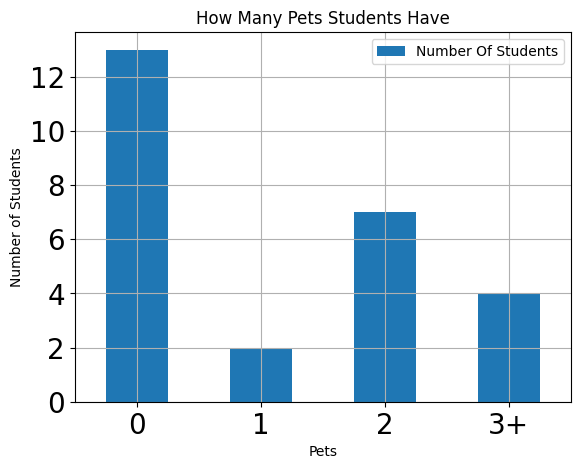

In [13]:
dfpets.plot.bar(x='num_of_pets', y='Number Of Students', rot=0)
plt.xlabel('Pets')
plt.ylabel('Number of Students')
plt.title('How Many Pets Students Have')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
#This graph shows how many students have 0,1,2,3 or more pets

In [14]:
Compsci = ((df["MajorNew"] == "COMPSCI").sum()).item()
Datasci = ((df["MajorNew"] == "DATA").sum()).item()
Other = ((df["MajorNew"] == "Other").sum()).item()
MajorComplete = [Compsci,Datasci, Other]
dfmajor = pd.DataFrame(MajorComplete, index=['Computer Science', 'Data Science', 'Other'], columns=['Majors in CSCI 1070'])
MajorComplete

[18, 4, 4]

array([<Axes: ylabel='Majors in CSCI 1070'>], dtype=object)

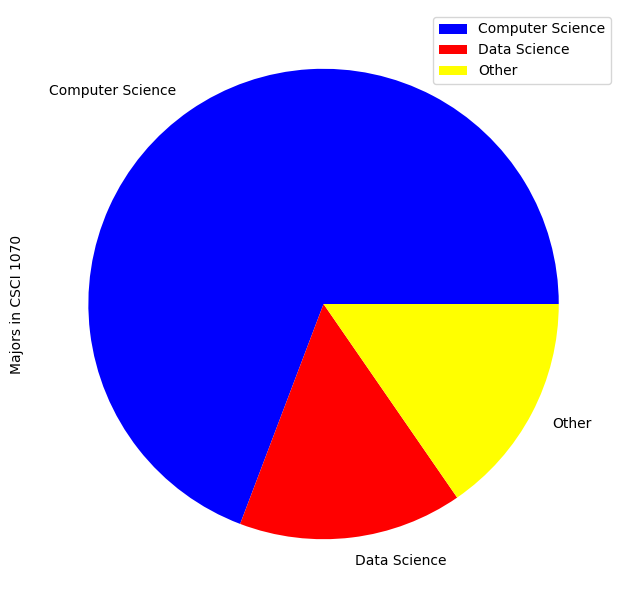

In [21]:

dfmajor.plot(kind='pie', subplots=True, figsize=(8,6), colors = ("blue","red","yellow"))
#This graph visualizes the amount of Computer Science, Data Science, and Other majors as a pecentage of a whole circle 
#Making a pie plot.

In [16]:
age17 = ((df["Age"] == "17").sum()).item()
age18 = ((df["Age"] == "18").sum()).item()
age19 = ((df["Age"] == "19").sum()).item()
age20 = ((df["Age"] == "20").sum()).item()
age21 = ((df["Age"] == "21").sum()).item()
agecomplete = [age17,age18, age19,age20,age21]
dfage = pd.DataFrame({"ages": ["17","18","19","20","21"],
                       "#ages": agecomplete})

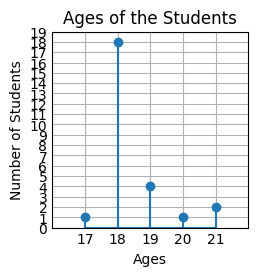

In [17]:
plt.style.use('_mpl-gallery')
x = 17 + np.arange(5)
y = agecomplete

fig, ax = plt.subplots()
ax.stem(x, y)

ax.set(xlim=(16, 22), xticks=np.arange(17, 22),
       ylim=(0, 19), yticks=np.arange(0, 20))

plt.xlabel('Ages')
plt.ylabel('Number of Students')
plt.title('Ages of the Students')
plt.show()
#This stem plot shows how many students are how old in the whole class in the range 17-21 years

array([<Axes: ylabel='Food in CSCI 1070'>], dtype=object)

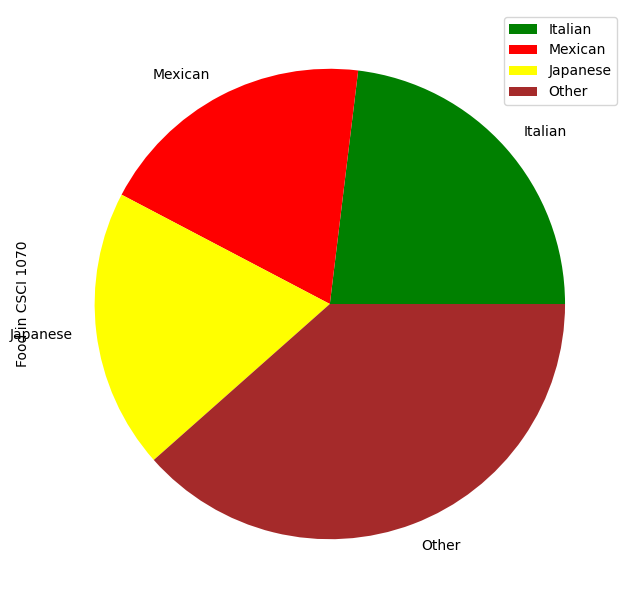

In [18]:
Italian = ((df["FavoriteFood"] == "Italian").sum()).item()
Mexican = ((df["FavoriteFood"] == "Mexican").sum()).item()
Japanese = ((df["FavoriteFood"] == "Japanese").sum()).item()
OtherFood = ((df["FavoriteFood"] == "Other").sum()).item()
FoodComplete = [Italian,Mexican, Japanese, OtherFood]
dffood = pd.DataFrame(FoodComplete, index=['Italian', 'Mexican',"Japanese", 'Other'], columns=['Food in CSCI 1070'])
dffood.plot(kind='pie', subplots=True, figsize=(8,6), colors = ("green","red","yellow", "brown"))
#This pie plot compares the favorite cusines of students as a percentage of a whole circle

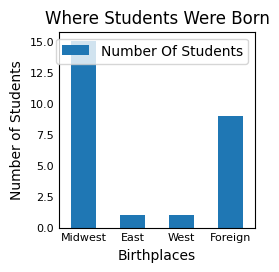

In [19]:
Midwest = ((df["Birthplace"] == "Midwest").sum()).item()
East = ((df["Birthplace"] == "East").sum()).item()
West = ((df["Birthplace"] == "West").sum()).item()
Foreign = ((df["Birthplace"] == "Foreign").sum()).item()
Birthplace = [Midwest,East, West,Foreign]
dfbirth = pd.DataFrame({"Birthplaces": ["Midwest","East","West","Foreign"],
                       "Number Of Students": Birthplace})
dfbirth.plot.bar(x='Birthplaces', y='Number Of Students', rot=0)
plt.xlabel('Birthplaces')
plt.ylabel('Number of Students')
plt.title('Where Students Were Born')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
#This histogram shows how many students were born in the Midwest, East Coast, West Coast, and outside of the US
